In [1]:
# misc
import warnings
warnings.filterwarnings('ignore')
import gc

# basic imports
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline
plt.style.use('seaborn')
sns.set(palette='colorblind')

# processing
from sklearn.model_selection import KFold
from sklearn.metrics import mean_squared_error
from sklearn.feature_selection import VarianceThreshold
from scipy.stats import gmean
from scipy.sparse import csr_matrix

import shap

# models
import xgboost as xgb
import lightgbm as lgb
import catboost as cb
from sklearn.linear_model import LinearRegression, Ridge

In [11]:
# This will be now a dataframe
def stats_prop(df, usefractions=False):
    means = []
    gmeans = []
    medians = []
    stds = []
    skews = []
    kurts = []
    mins = []
    maxs = []
    sums = []
    counts = []
    fractions = []
    q1s = []
    q3s = []
    p10s = []
    p20s = []
    p30s = []
    p40s = []
    p60s = []
    p70s = []
    p80s = []
    p90s = []
    log_means = []
    log_gmeans = []
    log_medians = []
    log_stds = []
    log_skews = []
    log_kurts = []
    log_mins = []
    log_maxs = []
    log_q1s = []
    log_q3s = []
    log_p10s = []
    log_p20s = []
    log_p30s = []
    log_p40s = []
    log_p60s = []
    log_p70s = []
    log_p80s = []
    log_p90s = []
       
    for i, row in df.iterrows():
        nonzero_values = row[row.nonzero()[0]]
        if usefractions:
            nonzero_values = nonzero_values[nonzero_values-nonzero_values//1 != 0.]
        means.append(nonzero_values.mean())
        gmeans.append(gmean(nonzero_values))
        medians.append(nonzero_values.median())
        stds.append(nonzero_values.std())
        skews.append(nonzero_values.skew())
        kurts.append(nonzero_values.kurtosis())
        mins.append(nonzero_values.min())
        maxs.append(nonzero_values.max())
        sums.append(nonzero_values.sum())
        counts.append(nonzero_values.count())
        fractions.append(nonzero_values.count()/row.count())        
        q1s.append(np.percentile(nonzero_values, q=25) if len(nonzero_values)>0 else np.nan)
        q3s.append(np.percentile(nonzero_values, q=75) if len(nonzero_values)>0 else np.nan)
        p10s.append(np.percentile(nonzero_values, q=10) if len(nonzero_values)>0 else np.nan)
        p20s.append(np.percentile(nonzero_values, q=20) if len(nonzero_values)>0 else np.nan)
        p30s.append(np.percentile(nonzero_values, q=30) if len(nonzero_values)>0 else np.nan)
        p40s.append(np.percentile(nonzero_values, q=40) if len(nonzero_values)>0 else np.nan)
        p60s.append(np.percentile(nonzero_values, q=60) if len(nonzero_values)>0 else np.nan)
        p70s.append(np.percentile(nonzero_values, q=70) if len(nonzero_values)>0 else np.nan)
        p80s.append(np.percentile(nonzero_values, q=80) if len(nonzero_values)>0 else np.nan)
        p90s.append(np.percentile(nonzero_values, q=90) if len(nonzero_values)>0 else np.nan)
        log_means.append(np.log1p(nonzero_values).mean())
        log_gmeans.append(gmean(np.log1p(nonzero_values)))
        log_medians.append(np.log1p(nonzero_values).median())
        log_stds.append(np.log1p(nonzero_values).std())
        log_skews.append(np.log1p(nonzero_values).skew())
        log_kurts.append(np.log1p(nonzero_values).kurtosis())
        log_mins.append(np.log1p(nonzero_values).min())
        log_maxs.append(np.log1p(nonzero_values).max())
        log_q1s.append(np.percentile(np.log1p(nonzero_values), q=25) if len(nonzero_values)>0 else np.nan)
        log_q3s.append(np.percentile(np.log1p(nonzero_values), q=75) if len(nonzero_values)>0 else np.nan)
        log_p10s.append(np.percentile(np.log1p(nonzero_values), q=10) if len(nonzero_values)>0 else np.nan)
        log_p20s.append(np.percentile(np.log1p(nonzero_values), q=20) if len(nonzero_values)>0 else np.nan)
        log_p30s.append(np.percentile(np.log1p(nonzero_values), q=30) if len(nonzero_values)>0 else np.nan)
        log_p40s.append(np.percentile(np.log1p(nonzero_values), q=40) if len(nonzero_values)>0 else np.nan)
        log_p60s.append(np.percentile(np.log1p(nonzero_values), q=60) if len(nonzero_values)>0 else np.nan)
        log_p70s.append(np.percentile(np.log1p(nonzero_values), q=70) if len(nonzero_values)>0 else np.nan)
        log_p80s.append(np.percentile(np.log1p(nonzero_values), q=80) if len(nonzero_values)>0 else np.nan)
        log_p90s.append(np.percentile(np.log1p(nonzero_values), q=90) if len(nonzero_values)>0 else np.nan)
    
    #stat_df = pd.DataFrame({'means': np.array(means)})
    #stat_df['gmeans'] = np.array(gmeans)
    #stat_df['medians'] = np.array(medians)
    #stat_df['stds'] = np.array(stds)
    #stat_df['skews'] = np.array(skews)
    #stat_df['kurts'] = np.array(kurts)
    #stat_df['mins'] = np.array(mins)
    #stat_df['maxs'] = np.array(maxs)
    #stat_df['sums'] = np.array(sums)
    #stat_df['counts'] = np.array(counts)
    #stat_df['fractions'] = np.array(fractions)
    #stat_df['q1s'] = np.array(q1s)
    #stat_df['q3s'] = np.array(q3s)
    #stat_df['p10s'] = np.array(p10s)
    #stat_df['p20s'] = np.array(p20s)
    #stat_df['p30s'] = np.array(p30s)
    #stat_df['p40s'] = np.array(p40s)
    #stat_df['p60s'] = np.array(p60s)
    #stat_df['p70s'] = np.array(p70s)
    #stat_df['p80s'] = np.array(p80s)
    #stat_df['p90s'] = np.array(p90s)
    #stat_df['log_means'] = np.array(log_means)
    stat_df = pd.DataFrame({'log_means': np.array(log_means)})
    stat_df['log_gmeans'] = np.array(log_gmeans)
    stat_df['log_medians'] = np.array(log_medians)
    #stat_df['log_stds'] = np.array(log_stds)
    #stat_df['log_skews'] = np.array(log_skews)
    #stat_df['log_kurts'] = np.array(log_kurts)
    stat_df['log_mins'] = np.array(log_mins)
    stat_df['log_maxs'] = np.array(log_maxs)
    stat_df['log_q1s'] = np.array(log_q1s)
    stat_df['log_q3s'] = np.array(log_q3s)
    stat_df['log_p10s'] = np.array(log_p10s)
    stat_df['log_p20s'] = np.array(log_p20s)
    stat_df['log_p30s'] = np.array(log_p30s)
    stat_df['log_p40s'] = np.array(log_p40s)
    stat_df['log_p60s'] = np.array(log_p60s)
    stat_df['log_p70s'] = np.array(log_p70s)
    stat_df['log_p80s'] = np.array(log_p80s)
    stat_df['log_p90s'] = np.array(log_p90s)
    
    return stat_df    

In [12]:
train_data = pd.read_csv('../data/train.csv')
test_data = pd.read_csv('../data/test.csv')

In [13]:
target = train_data.target
train_ID = train_data.ID
train_data = train_data.drop(['target', 'ID'], axis=1)
test_ID = test_data.ID
test_data = test_data.drop(['ID'], axis=1)

In [14]:
vt = VarianceThreshold(threshold=0.)
vt.fit(train_data)
selected_columns = train_data.columns[vt.get_support(indices=True)]

In [15]:
train_data = train_data[selected_columns]
test_data = test_data[selected_columns]

train_data.shape

(4459, 4735)

In [16]:
train_data = train_data.T.drop_duplicates().T
test_data = test_data[train_data.columns]

train_data.shape

(4459, 4730)

In [17]:
train_data = train_data/1000.
test_data = test_data/1000.

In [18]:
log_target = np.log1p(target/1000.)
#log_target = np.log1p(target)

In [19]:
stat_train = stats_prop(train_data)
stat_test = stats_prop(test_data)

In [20]:
train_data = np.log1p(train_data).replace(0., np.nan)
test_data = np.log1p(test_data).replace(0., np.nan)

In [22]:
train_data.head()

,48df886f9,0deb4b6a8,34b15f335,a8cb14b00,2f0771a37,30347e683,d08d1fbe3,6ee66e115,20aa07010,dc5a8f1d8,...,3ecc09859,9281abeea,8675bec0b,3a13ed79a,f677d4d13,71b203550,137efaa80,fb36b89d9,7e293fbaf,9fc776466
0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,7.696667,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,7.601402,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [21]:
stat_train.head()

,log_means,log_gmeans,log_medians,log_mins,log_maxs,log_q1s,log_q3s,log_p10s,log_p20s,log_p30s,log_p40s,log_p60s,log_p70s,log_p80s,log_p90s
0,7.958966,7.840273,7.780159,5.525453,10.596660,6.817007,8.878479,6.016226,6.579178,7.030055,7.410382,8.309112,8.705490,9.341456,9.998843
1,8.367472,8.307402,7.707962,6.685861,10.819798,7.601402,9.157766,7.601402,7.601402,7.601402,7.601402,8.294300,8.853808,9.544127,9.878957
2,7.814503,7.706173,8.294300,5.303305,9.392745,7.010038,8.677932,5.942616,6.775018,7.364943,7.824446,8.357977,8.612685,8.699681,9.108949
3,6.018596,5.610893,5.543963,1.098612,8.699681,4.615121,7.601402,4.615121,4.615121,4.615121,5.303305,6.338374,7.472248,7.601402,8.664920
4,7.852233,7.647920,8.444320,4.110874,10.536433,7.074117,8.972850,5.303305,5.993961,7.337760,7.601402,8.699681,8.869724,8.987322,9.301593


In [12]:
#train_leak = pd.read_csv('../submission_files/leak/public/01. train_leak.csv', usecols=['compiled_leak']).replace(np.nan, 0.)
#test_leak = pd.read_csv('../submission_files/leak/public/01. test_leak.csv', usecols=['compiled_leak']).replace(np.nan, 0.)

In [13]:
#leak_index_train = train_leak[train_leak.compiled_leak != 0.].index.values
#leak_index_test = test_leak[test_leak.compiled_leak != 0.].index.values

In [14]:
#leak_values_train = train_leak.compiled_leak[leak_index_train].values
#leak_values_test = test_leak.compiled_leak[leak_index_test].values

In [23]:
cols_leak = ['f190486d6', '58e2e02e6', 'eeb9cd3aa', '9fd594eec', '6eef030c1', '15ace8c9f', 'fb0f5dbfe', '58e056e12', '20aa07010',
             '024c577b9', 'd6bb78916', 'b43a7cfd5', '58232a6fb', '1702b5bf0', '324921c7b', '62e59a501', '2ec5b290f', '241f0f867',
             'fb49e4212', '66ace2992', 'f74e8f13d', '5c6487af1', '963a49cdc', '26fc93eb7', '1931ccfdd', '703885424', '70feb1494',
             '491b9ee45', '23310aa6f', 'e176a204a', '6619d81fc', '1db387535', 'fc99f9426', '91f701ba2', '0572565c2', '190db8488',
             'adb64ff71', 'c47340d97', 'c5a231d81', '0ff32eb98']

In [24]:
new_train = train_data.drop(cols_leak, axis=1)

In [25]:
# CV folds
kf = KFold(n_splits=10, shuffle=True)
n_splits = kf.get_n_splits()

In [26]:
# model parameters
params = {'learning_rate':0.5, 'metric':'rmse', 'max_bin':63, 'device':'cpu'}

In [27]:
shap_values = np.zeros((new_train.shape[0],new_train.shape[1]+1))

for train_index, test_index in kf.split(new_train):
    
    X_tr, X_tst = new_train.values[train_index], new_train.values[test_index]
    y_tr, y_tst = log_target[train_index], log_target[test_index]
    
    train_set = lgb.Dataset(X_tr, label=y_tr)
    valid_set = lgb.Dataset(X_tst, label=y_tst, reference=train_set)
    
    bst = lgb.train(params, train_set, num_boost_round=50, valid_sets=[train_set, valid_set], early_stopping_rounds=5,
                    verbose_eval=50)

    shap_values += shap.TreeExplainer(bst).shap_values(new_train.values)/n_splits

Training until validation scores don't improve for 5 rounds.
Early stopping, best iteration is:
[6]	training's rmse: 1.19336	valid_1's rmse: 1.58994
Training until validation scores don't improve for 5 rounds.
Early stopping, best iteration is:
[3]	training's rmse: 1.34282	valid_1's rmse: 1.52553
Training until validation scores don't improve for 5 rounds.
Early stopping, best iteration is:
[3]	training's rmse: 1.34113	valid_1's rmse: 1.54612
Training until validation scores don't improve for 5 rounds.
Early stopping, best iteration is:
[4]	training's rmse: 1.28031	valid_1's rmse: 1.5073
Training until validation scores don't improve for 5 rounds.
Early stopping, best iteration is:
[3]	training's rmse: 1.33352	valid_1's rmse: 1.5501
Training until validation scores don't improve for 5 rounds.
Early stopping, best iteration is:
[4]	training's rmse: 1.28396	valid_1's rmse: 1.55033
Training until validation scores don't improve for 5 rounds.
Early stopping, best iteration is:
[4]	training

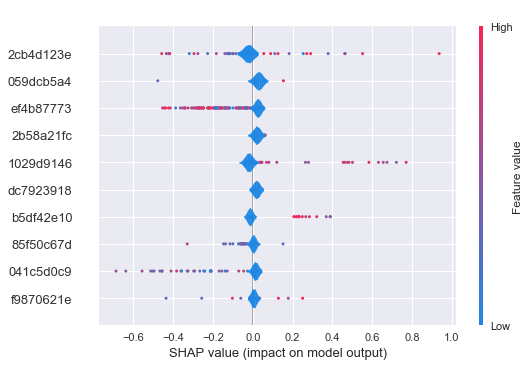

In [28]:
shap.summary_plot(shap_values, train_data, max_display=10, plot_type='violin')

In [29]:
N = 150
sorted_columns = np.argsort(np.sum(np.abs(shap_values), axis=0)[:-1])[::-1]
most_relevant = train_data.columns[sorted_columns[:N]]

In [31]:
union_cols = list(set(most_relevant)|set(cols_leak))
#diff_cols = list(set(most_relevant)-set(cols_leak))

In [32]:
feat_train = train_data[union_cols]
feat_test = test_data[union_cols]

In [33]:
feat_train = feat_train[feat_train.isna().sum().sort_values().index.values]
feat_test = feat_test[feat_train.isna().sum().sort_values().index.values]

#### Assembly

In [34]:
train_final = np.hstack((feat_train.values, stat_train.values))
test_final = np.hstack((feat_test.values, stat_test.values))

In [35]:
print('Final number of features: %i' % train_final.shape[1])

Final number of features: 205


### before anything, grid search

#### xgb

params before:
{'learning_rate':0.1, 'colsample_bytree': .04, 'eval_metric':'rmse', 'lambda': 3., 'alpha': 0.03}

params now:
{'learning_rate':0.003, 'colsample_bytree': .75, 'eval_metric':'rmse', 'lambda': 0.0004, 'alpha': 0., 'min_child_weight': 4, 'subsample': 0.15}

In [ ]:
from sklearn.model_selection import GridSearchCV

In [ ]:
cv_params = {'learning_rate': [0.003]}
ind_params = {'num_boost_round': 6000, 'colsample_bytree': 0.75, 'min_child_weight': 4, 'reg_alpha': 0.,
             'subsample': 0.15, 'reg_lambda': 0.0004}

In [ ]:
optimized_GBM = GridSearchCV(xgb.XGBRegressor(**ind_params), cv_params, scoring = 'neg_mean_squared_error', cv = 5, n_jobs = -1,
                            verbose=1)

In [ ]:
optimized_GBM.fit(train_final, log_target)

In [ ]:
optimized_GBM.best_params_

#### lgb

params before:
{'learning_rate':0.001, 'lambda_l2': 0.05, 'feature_fraction': 0.075, 'lambda_l1': 0.01}

params now:
{'learning_rate':0.002, 'lambda_l2': 0.1, 'feature_fraction': 0.1, 'lambda_l1': 0.002}}

In [ ]:
cv_params = {'learning_rate': [0.002], 'lambda_l2': [0.1], 'feature_fraction': [0.08, 0.1,0.12],
             'lambda_l1': [0.002]}

In [ ]:
def crossvaltest(params,n_splits=5):
    kf = KFold(n_splits=n_splits,shuffle=True) 
    res = []
    for train_index, test_index in kf.split(train_final):
        X_tr, X_tst = train_final[train_index], train_final[test_index]
        y_tr, y_tst = log_target[train_index], log_target[test_index]

        train_set = lgb.Dataset(X_tr, label=y_tr)
        valid_set = lgb.Dataset(X_tst, label=y_tst, reference=train_set)

        bst = lgb.train(params, train_set, num_boost_round=7500, valid_sets=[train_set, valid_set], early_stopping_rounds=500, 
                        verbose_eval=1000)

        y_val = bst.predict(X_tst, num_iteration=bst.best_iteration)

        rmsle = np.sqrt(mean_squared_error(y_tst, y_val))

        res.append(rmsle)
    return np.mean(res)

In [ ]:
from itertools import product

def param_tune(n_splits=5):
    score = ('nothing', 3.)
    for prms in product(cv_params['learning_rate'],
                      cv_params['lambda_l2'],
                      cv_params['feature_fraction'],
                      cv_params['lambda_l1']):
        params = {'metric': 'rmse', 'learning_rate': prms[0], 'lambda_l2': prms[1], 'feature_fraction': prms[2],
                  'lambda_l1': prms[3]}
        res = crossvaltest(params,n_splits)
        # save the crossvalidation result so that future iterations can reuse the best parameters
        print(res)
        if res<score[1]:
            score = (str(params), res)
    return score

In [ ]:
bestpar = param_tune()

In [ ]:
bestpar

#### cb

params before:
{'eta':0.01, 'l2_leaf_reg: 3, 'border_count': 32, 'depth': 5}

params now:
{'learning_rate':0.01, 'l2_leaf_reg': 8, 'border_count': 45, 'depth': 5}}

In [ ]:
cv_params = {'eta': [0.01], 'l2_leaf_reg':[8], 'border_count':[45], 'depth': [5]}

In [ ]:
def crossvaltest(params,n_splits=5):
    kf = KFold(n_splits=n_splits,shuffle=True) 
    res = []
    for train_index, test_index in kf.split(train_final):
        X_tr, X_tst = train_final[train_index], train_final[test_index]
        y_tr, y_tst = log_target[train_index], log_target[test_index]

        bst = cb.CatBoostRegressor(eta=params[0], l2_leaf_reg=params[1], border_count=params[2], iterations=7500,
                                   loss_function='RMSE', eval_metric='RMSE', depth=params[3])
    
        bst.fit(X_tr, y_tr, use_best_model=True, eval_set=(X_tst, y_tst), verbose=False)

        y_val = bst.predict(X_tst)

        rmsle = np.sqrt(mean_squared_error(y_tst, y_val))

        res.append(rmsle)
    return np.mean(res)

In [ ]:
from itertools import product

def param_tune(n_splits=5):
    score = ('nothing', 3.)
    for prms in product(cv_params['eta'],
                      cv_params['l2_leaf_reg'],
                      cv_params['border_count'],
                      cv_params['depth']):
        res = crossvaltest(prms,n_splits)
        # save the crossvalidation result so that future iterations can reuse the best parameters
        print(res)
        if res<score[1]:
            score = (str(prms), res)
    return score

In [ ]:
bestpar = param_tune()

In [ ]:
bestpar

### oof train+test

In [42]:
train_df = pd.DataFrame.from_dict({'ID': train_ID})
test_df = pd.DataFrame.from_dict({'ID': test_ID})

In [47]:
def lgbCV(ooftrain, ooftest, n_folds=5, multiplier=10):
    params = {'boosting': 'gbdt', 'objective':'regression', 'learning_rate':0.002, 'metric':'rmse', 'max_bin':63, 
              'lambda_l2': 0.1, 'device':'cpu', 'feature_fraction': 0.1, 'lambda_l1': 0.002}
    for i in range(multiplier):
        ooftrain['lgb_'+str(i)] = np.zeros(train_ID.shape[0])
        ooftest['lgb_'+str(i)] = np.zeros(test_ID.shape[0])
        kf = KFold(n_splits=n_folds,shuffle=True)
        res = []
        for train_index, test_index in kf.split(train_final):
            X_tr, X_tst = train_final[train_index], train_final[test_index]
            y_tr, y_tst = log_target[train_index], log_target[test_index]

            train_set = lgb.Dataset(X_tr, label=y_tr)
            valid_set = lgb.Dataset(X_tst, label=y_tst, reference=train_set)

            bst = lgb.train(params, train_set, num_boost_round=7500, valid_sets=[train_set, valid_set],
                            early_stopping_rounds=500, verbose_eval=False)

            y_val = bst.predict(X_tst, num_iteration=bst.best_iteration)

            rmsle = np.sqrt(mean_squared_error(y_tst, y_val))
            
            res.append(rmsle)
            
            ooftrain['lgb_'+str(i)][test_index] = y_val
    
            ooftest['lgb_'+str(i)] = ooftest['lgb_'+str(i)] + bst.predict(test_final, 
                                                                                   num_iteration=bst.best_iteration)/n_folds

        print(np.mean(res))
    return

In [48]:
def xgbCV(ooftrain, ooftest, n_folds=5, multiplier=10):
    params = {'booster': 'gbtree', 'learning_rate':0.003, 'colsample_bytree': .75, 'eval_metric':'rmse', 'lambda': 0.0004,
              'alpha': 0., 'min_child_weight': 4, 'subsample': 0.15}
    test_set = xgb.DMatrix(test_final)
    for i in range(multiplier):
        ooftrain['xgb_'+str(i)] = np.zeros(train_ID.shape[0])
        ooftest['xgb_'+str(i)] = np.zeros(test_ID.shape[0])
        kf = KFold(n_splits=n_folds,shuffle=True)
        res = []
        for train_index, test_index in kf.split(train_final):
            X_tr, X_tst = train_final[train_index], train_final[test_index]
            y_tr, y_tst = log_target[train_index], log_target[test_index]

            train_set = xgb.DMatrix(X_tr, label=y_tr)
            valid_set = xgb.DMatrix(X_tst, label=y_tst)

            bst = xgb.train(params, train_set, num_boost_round=20000, evals=[(train_set, 'train'), (valid_set, 'val')],
                            early_stopping_rounds=500, verbose_eval=False)

            y_val = bst.predict(valid_set, ntree_limit=bst.best_ntree_limit)

            rmsle = np.sqrt(mean_squared_error(y_tst, y_val))
            
            res.append(rmsle)
            
            ooftrain['xgb_'+str(i)][test_index] = y_val
    
            ooftest['xgb_'+str(i)] = ooftest['xgb_'+str(i)] + bst.predict(test_set,
                                                                                     ntree_limit=bst.best_ntree_limit)/n_folds

        print(np.mean(res))
    return

In [49]:
def cbCV(ooftrain, ooftest, n_folds=5, multiplier=10):
    for i in range(multiplier):
        ooftrain['cb_'+str(i)] = np.zeros(train_ID.shape[0])
        ooftest['cb_'+str(i)] = np.zeros(test_ID.shape[0])
        kf = KFold(n_splits=n_folds,shuffle=True)
        res = []
        for train_index, test_index in kf.split(train_final):
            X_tr, X_tst = train_final[train_index], train_final[test_index]
            y_tr, y_tst = log_target[train_index], log_target[test_index]

            bst = cb.CatBoostRegressor(eta=0.01, l2_leaf_reg=8, border_count=45, iterations=7500,
                                       loss_function='RMSE', eval_metric='RMSE', depth=5)
    
            bst.fit(X_tr, y_tr, use_best_model=True, eval_set=(X_tst, y_tst), verbose=False)

            y_val = bst.predict(X_tst)

            rmsle = np.sqrt(mean_squared_error(y_tst, y_val))
            
            res.append(rmsle)
            
            ooftrain['cb_'+str(i)][test_index] = y_val
    
            ooftest['cb_'+str(i)] = ooftest['cb_'+str(i)] + bst.predict(test_final)/n_folds

        print(np.mean(res))
    return

In [50]:
lgbCV(train_df,test_df)

1.336810394702624
1.3378176217239106
1.3346796810999026
1.3365288863039737
1.3382978429249843
1.3381799259513099
1.3378764919975332
1.3332503589408475
1.3373477672915817
1.336381256148576


In [51]:
xgbCV(train_df,test_df)

1.3480678751593917
1.341467694510134
1.3446946245867697
1.3454574565354662
1.343183409973572
1.3413988439340971
1.3445565726329687
1.3420974542056143
1.3433654289263044
1.3437278098444216


In [52]:
cbCV(train_df,test_df)

1.344008292803654
1.3549151515336553
1.3467101021526566
1.345453710372965
1.3478708698884054
1.3474964862042182
1.3531385152567124
1.3462103315114609
1.3453524204186504
1.345422985027589


In [53]:
train_df.head()

,ID,lgb_0,lgb_1,lgb_2,lgb_3,lgb_4,lgb_5,lgb_6,lgb_7,lgb_8,...,cb_0,cb_1,cb_2,cb_3,cb_4,cb_5,cb_6,cb_7,cb_8,cb_9
0,000d6aaf2,7.753029,7.747617,7.825004,7.870987,7.710407,7.980169,7.825685,7.759748,7.761133,...,7.992147,8.038068,8.016566,7.950019,8.136293,8.067785,8.017080,8.121889,8.099864,8.122183
1,000fbd867,8.261636,8.186773,8.005811,8.028526,8.188043,8.104598,8.023031,8.058528,8.105224,...,8.120449,8.031286,8.185972,8.127230,8.120759,8.370089,8.275958,8.186946,8.176630,8.193901
2,0027d6b71,7.820717,7.897378,7.851823,7.890696,7.853119,7.763616,7.783942,7.844068,7.812068,...,7.730164,7.662585,7.679829,7.612589,7.568582,7.637506,7.723344,7.763682,7.667777,7.649965
3,0028cbf45,6.701742,6.927078,6.923967,6.838828,6.762302,6.789089,6.840253,6.748182,6.734840,...,6.769028,6.700885,6.729224,6.696022,6.488180,6.735504,6.765385,6.540103,6.627396,6.507892
4,002a68644,7.995028,8.010985,8.010574,7.948614,8.063189,7.969004,7.959648,7.996370,8.067984,...,7.873266,8.044569,8.104314,7.904591,7.870340,7.810409,7.951151,7.936653,7.791888,8.072439


In [54]:
test_df.head()

,ID,lgb_0,lgb_1,lgb_2,lgb_3,lgb_4,lgb_5,lgb_6,lgb_7,lgb_8,...,cb_0,cb_1,cb_2,cb_3,cb_4,cb_5,cb_6,cb_7,cb_8,cb_9
0,000137c73,7.561947,7.579051,7.538180,7.572240,7.548354,7.601278,7.589472,7.574483,7.568794,...,6.956811,6.980940,7.065855,7.042854,7.238453,7.165427,6.848261,7.015738,7.049149,7.146585
1,00021489f,7.345030,7.297256,7.299332,7.314983,7.308169,7.317639,7.321649,7.301856,7.307182,...,7.305182,7.357889,7.289545,7.297676,7.345311,7.323508,7.290049,7.282990,7.298458,7.276539
2,0004d7953,7.603411,7.596046,7.606833,7.586825,7.611509,7.611546,7.615185,7.583842,7.593907,...,7.472648,7.487265,7.490059,7.519690,7.544184,7.488554,7.511034,7.515903,7.470030,7.472780
3,00056a333,8.461938,8.506863,8.540237,8.485902,8.480631,8.495072,8.460724,8.493157,8.475631,...,8.439960,8.381890,8.472869,8.419513,8.377253,8.317931,8.435537,8.422719,8.358623,8.383203
4,00056d8eb,7.834957,7.834479,7.853647,7.856089,7.866123,7.813269,7.835235,7.825301,7.825653,...,7.793000,7.815992,7.743884,7.821484,7.828551,7.807781,7.796624,7.766287,7.802120,7.780669


In [55]:
train_df.to_csv('../submission_files/leak/oof/logtrain_df_sumf_pc_10x5fold.csv', index=False)
test_df.to_csv('../submission_files/leak/oof/logtest_df_sumf_pc_10x5fold.csv', index=False)
#train_df = pd.read_csv('../submission_files/leak/20. train_df_sumf_10x5fold.csv')
#test_df = pd.read_csv('../submission_files/leak/20. test_df_sumf_10x5fold.csv')

In [56]:
train_df = train_df.drop(['ID'], axis=1)
test_df = test_df.drop(['ID'], axis=1)

In [97]:
train_df = train_df[train_df.columns[:10]]
test_df = test_df[test_df.columns[:10]]

In [98]:
#train_df2 = np.hstack((train_df.values, stat_train.values))#, stat_train2.values))
#test_df2 = np.hstack((test_df.values, stat_test.values))#, stat_test2.values))
train_df2 = train_df.values
test_df2 = test_df.values

In [99]:
train_df2.shape

(4459, 10)

### Final CV

#### cb

In [100]:
def finalCV(n_folds=5, multiplier=10):
    submission = pd.DataFrame.from_dict({'ID': test_ID, 'target': np.zeros(test_ID.shape[0])})
    for i in range(multiplier):
        preds = np.zeros(test_ID.shape[0])
        kf = KFold(n_splits=n_folds,shuffle=True)
        res = []
        for train_index, test_index in kf.split(train_df2):
            X_tr, X_tst = train_df2[train_index], train_df2[test_index]
            y_tr, y_tst = log_target[train_index], log_target[test_index]

            bst = cb.CatBoostRegressor(eta=0.01, iterations=2500,
                                       loss_function='RMSE', eval_metric='RMSE', depth=4)
    
            bst.fit(X_tr, y_tr, use_best_model=True, eval_set=(X_tst, y_tst), verbose=False)

            y_val = bst.predict(X_tst)

            rmsle = np.sqrt(mean_squared_error(y_tst, y_val))
            
            res.append(rmsle)
            
            preds = preds + bst.predict(test_df2)/n_folds

        print(np.mean(res))
        
        submission.target = submission.target + preds/multiplier
    return submission

In [60]:
def lgbfinalCV(n_folds=5, multiplier=10):
    params = {'boosting': 'gbdt', 'objective':'regression', 'learning_rate':0.01, 'metric':'rmse', 'max_bin':63, 
              'lambda_l2': 0.1, 'device':'cpu', 'feature_fraction': 0.1, 'lambda_l1': 0.002}
    submission = pd.DataFrame.from_dict({'ID': test_ID, 'target': np.zeros(test_ID.shape[0])})
    for i in range(multiplier):
        preds = np.zeros(test_ID.shape[0])
        kf = KFold(n_splits=n_folds,shuffle=True)
        res = []
        for train_index, test_index in kf.split(train_df2):
            X_tr, X_tst = train_df2[train_index], train_df2[test_index]
            y_tr, y_tst = log_target[train_index], log_target[test_index]

            train_set = lgb.Dataset(X_tr, label=y_tr)
            valid_set = lgb.Dataset(X_tst, label=y_tst, reference=train_set)

            bst = lgb.train(params, train_set, num_boost_round=7500, valid_sets=[train_set, valid_set],
                            early_stopping_rounds=500, verbose_eval=False)

            y_val = bst.predict(X_tst, num_iteration=bst.best_iteration)

            rmsle = np.sqrt(mean_squared_error(y_tst, y_val))
            
            res.append(rmsle)
            
            preds = preds + bst.predict(test_df2, num_iteration=bst.best_iteration)/n_folds

        print(np.mean(res))
        
        submission.target = submission.target + preds/multiplier
    return submission

In [85]:
def xgbfinalCV(n_folds=5, multiplier=10):
    params = {'booster': 'gbtree', 'learning_rate':0.003, 'colsample_bytree': .75, 'eval_metric':'rmse', 'lambda': 0.0004,
              'alpha': 0., 'min_child_weight': 4, 'subsample': 0.15}
    test_set = xgb.DMatrix(test_df2)
    submission = pd.DataFrame.from_dict({'ID': test_ID, 'target': np.zeros(test_ID.shape[0])})
    for i in range(multiplier):
        preds = np.zeros(test_ID.shape[0])
        kf = KFold(n_splits=n_folds,shuffle=True)
        res = []
        for train_index, test_index in kf.split(train_df2):
            X_tr, X_tst = train_df2[train_index], train_df2[test_index]
            y_tr, y_tst = log_target[train_index], log_target[test_index]

            train_set = xgb.DMatrix(X_tr, label=y_tr)
            valid_set = xgb.DMatrix(X_tst, label=y_tst)

            bst = xgb.train(params, train_set, num_boost_round=20000, evals=[(train_set, 'train'), (valid_set, 'val')],
                            early_stopping_rounds=500, verbose_eval=False)

            y_val = bst.predict(valid_set, ntree_limit=bst.best_ntree_limit)

            rmsle = np.sqrt(mean_squared_error(y_tst, y_val))
            
            res.append(rmsle)
            
            preds = preds + bst.predict(test_set, ntree_limit=bst.best_ntree_limit)/n_folds

        print(np.mean(res))
        
        submission.target = submission.target + preds/multiplier
    return submission

In [101]:
submission = finalCV()

1.3332032421066118
1.3320986439426643
1.3328091778544846
1.3326367550002678
1.3322724978461644
1.3319430932306084
1.3334892886605014
1.3321092911099763
1.3324263680839745
1.3317385631914755


In [64]:
submission = lgbfinalCV()

1.33897106236144
1.3381275352117918
1.3385496669332297
1.3392857125205417
1.3418888664651394
1.3396150809908751
1.3388484042978772
1.3412175592577835
1.3373434942910984
1.3351769330691794


In [86]:
submission = xgbfinalCV()

1.349358568308776
1.349915904849445
1.3486953708329945
1.3472002294240941
1.3475863731737476
1.3493306937302767
1.3497083232234177
1.3486509775743047
1.35118535169223
1.3432515261076807


#### ceiling to overestimate

In [102]:
#submission.target = 1000*np.ceil(submission.target)
#submission.target = 1000*submission.target
submission.target = 1000*np.ceil(np.expm1(submission.target))

In [103]:
submission.head(11)

,ID,target
0,000137c73,1880000.0
1,00021489f,1413000.0
2,0004d7953,1963000.0
3,00056a333,4797000.0
4,00056d8eb,2627000.0
5,0005fc190,2674000.0
6,000787e86,1814000.0
7,0008510a0,2903000.0
8,000895faf,3069000.0
9,000986fba,3005000.0


In [104]:
submission.to_csv('../submission_files/leak/39. logstackcb_onlylgb_sumf_pc.csv', index=False)

In [90]:
sub.target[leak_index_test] = leak_values_test

In [2]:
submission = pd.read_csv("../submission_files/leak/24. stackcb_sumf_pc_138_best.csv")

In [105]:
sub = submission.copy()

In [106]:
leak2 = pd.read_csv('../submission_files/leak/public/03. leak_extrafeat.csv')

leak2_idx = leak2[leak2.target != 0.].index.values
leak2_vals = leak2[leak2.target != 0.].target.values

leak2_vals = np.round(np.expm1(leak2_vals))

In [107]:
sub.target[leak2_idx] = leak2_vals

In [108]:
sub.head(11)

,ID,target
0,000137c73,1880000.0
1,00021489f,1413000.0
2,0004d7953,1963000.0
3,00056a333,4797000.0
4,00056d8eb,2627000.0
5,0005fc190,2674000.0
6,000787e86,1814000.0
7,0008510a0,2903000.0
8,000895faf,3069000.0
9,000986fba,3005000.0


In [109]:
sub.to_csv("../submission_files/leak/40. 39+public03.csv", index=False)

In [95]:
sub2 = pd.read_csv('../submission_files/leak/public/02. loveanswer_v11_maybe_063.csv')

In [15]:
sub2 = pd.read_csv('../submission_files/leak/28. stackcb+leak25_sumf_pc.csv')

In [19]:
sub3 = sub.copy()

In [17]:
sub3.target = 0.5*sub.target + 0.5*sub2.target

In [18]:
sub3.to_csv("../submission_files/leak/30. 05x28+05x29.csv", index=False)

In [8]:
ss = pd.read_csv('../submission_files/leak/28. 24+public03_059_best.csv')

In [9]:
sub['h'] = sub.target - ss.target

In [10]:
sub.h[sub.h!=0].index.values.shape

(37,)